In [82]:
import math
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import medical_lib as ml
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from matplotlib import pyplot
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from xgboost import plot_importance



Einlesen der Trainings-Daten

In [83]:
traindata = pd.read_csv('model1v3train_Filled.csv') #model1v3train_Filled
traindata = traindata.iloc[:, 3:] #3
traindata = traindata.sample(frac=1, random_state=42).reset_index(drop=True) #Shuffle Rows and Reset Index
train_features = traindata.iloc[:, :-1]
train_class = traindata.iloc[:, -1]


Einlesen der Test-Daten

In [85]:
testdata = pd.read_csv('model1v3test_Filled.csv') #model1v3test_Filled
testdata = testdata.iloc[:, 3:] #3
testdata = testdata.sample(frac=1, random_state=42).reset_index(drop=True)

test_features = testdata.iloc[:, :-1]
test_class = testdata.iloc[:, -1]

result = pd.read_csv('automated_algorithmen.csv')
result = result.iloc[:, 1:]

KNN:
Training

In [86]:
medKNN = KNeighborsClassifier(n_neighbors=4)
medKNN.fit(train_features,train_class)

KNeighborsClassifier(n_neighbors=4)

KNN:
Prediction

In [87]:
knnYpred = medKNN.predict(test_features)
accuracyKNN = accuracy_score(test_class, knnYpred)
precisionKNN = precision_score(test_class, knnYpred)
recallKNN = recall_score(test_class, knnYpred)
f1scoreKNN = f1_score(test_class, knnYpred)
print('KNN Accuracy: ', accuracyKNN, 'KNN Precision: ', precisionKNN, 'KNN Recall: ', recallKNN, 'KNN F1-Score: ', f1scoreKNN )
# index = result.index[result['Modellierung'] == 'Model_1_version_3'].tolist()
# result.at[index, 'KNN_precision'] = precisionKNN
# result.at[index, 'KNN_recall'] = recallKNN
# result.at[index, 'KNN_f1'] = f1scoreKNN
# result.to_csv('automated_algorithmen.csv')

KNN Accuracy:  0.6816479400749064 KNN Precision:  0.11764705882352941 KNN Recall:  0.5 KNN F1-Score:  0.19047619047619047


Logistic Regression: Training

In [88]:
lr_model = LogisticRegression()
lr_model.fit(train_features, train_class)

LogisticRegression()

Logistic Regression: Prediction

In [89]:
lr_y_pred = lr_model.predict(test_features)
lr_accuracyLogReg = accuracy_score(test_class, lr_y_pred)
lr_precisionLogReg = precision_score(test_class, lr_y_pred)
lr_recallLogReg = recall_score(test_class, lr_y_pred)
lr_f1scoreLogReg = f1_score(test_class, lr_y_pred)
print('Log-Regression Accuracy: ', lr_accuracyLogReg, 'Log-Regression Precision: ', lr_precisionLogReg, 'Log-Regression Recall: ', lr_recallLogReg, 'Log-Regression F1-Score: ', lr_f1scoreLogReg )
# index = result.index[result['Modellierung'] == 'Model_1_version_3'].tolist()
# result.at[index, 'Logistic_Regression_precision'] = lr_precisionLogReg
# result.at[index, 'Logistic_Regression_recall'] = lr_recallLogReg
# result.at[index, 'Logistic_Regression_f1'] = lr_f1scoreLogReg
# result.to_csv('automated_algorithmen.csv')

Log-Regression Accuracy:  0.599250936329588 Log-Regression Precision:  0.11504424778761062 Log-Regression Recall:  0.65 Log-Regression F1-Score:  0.1954887218045113


Decision Tree: Training

In [90]:
medical_DecTree = DecisionTreeClassifier(random_state=15)
medical_DecTree = medical_DecTree.fit(train_features, train_class)

Decision Tree: Prediction

In [91]:
decTree_pred = medical_DecTree.predict(test_features)
accuracyDecTree = accuracy_score(test_class, decTree_pred)
precisionDecTree = precision_score(test_class, decTree_pred)
recallDecTree = recall_score(test_class, decTree_pred)
f1scoreDecTree = f1_score(test_class, decTree_pred)
print('medical_DecTree Accuracy: ', accuracyDecTree, 'DecTree Precision: ', precisionDecTree, 'DecTree Recall: ', recallDecTree, 'DecTree F1-Score: ', f1scoreDecTree )
# index = result.index[result['Modellierung'] == 'Model_1_version_3'].tolist()
# result.at[index, 'Decision_Tree_precision'] = precisionDecTree
# result.at[index, 'Decision_Tree_recall'] = recallDecTree
# result.at[index, 'Decision_Tree_f1'] = f1scoreDecTree
# result.to_csv('automated_algorithmen.csv')

medical_DecTree Accuracy:  0.22846441947565543 DecTree Precision:  0.07727272727272727 DecTree Recall:  0.85 DecTree F1-Score:  0.14166666666666666


Random Forest: Training

In [92]:
medical_RF = RandomForestClassifier(random_state=43)
medical_RF.fit(train_features, train_class)

RandomForestClassifier(random_state=43)

Random Forest: Prediction

In [93]:
rfPred = medical_RF.predict(test_features)
accuracyRF = accuracy_score(test_class, rfPred)
precisionRF = precision_score(test_class, rfPred)
recallRF = recall_score(test_class, rfPred)
f1scoreRF = f1_score(test_class, rfPred)
print('Anzahl Estimator: 100 ', 'RF Accuracy: ', accuracyRF, 'RF Precision: ', precisionRF, 'RF Recall: ', recallRF, 'RF F1-Score: ', f1scoreRF )
# index = result.index[result['Modellierung'] == 'Model_1_version_3'].tolist()
# result.at[index, 'Random_Forest_precision'] = precisionRF
# result.at[index, 'Random_Forest_recall'] = recallRF
# result.at[index, 'Random_Forest_f1'] = f1scoreRF
# result.to_csv('automated_algorithmen.csv')

Anzahl Estimator: 100  RF Accuracy:  0.35580524344569286 RF Precision:  0.05813953488372093 RF Recall:  0.5 RF F1-Score:  0.10416666666666667


ADABoost: Training

In [94]:
adamodel = AdaBoostClassifier()
adamodel.fit(train_features, train_class)

AdaBoostClassifier()

ADABoost: Prediction

In [95]:
adamodel_prediction = adamodel.predict(test_features)
adamodel_accuracy = accuracy_score(test_class, adamodel_prediction)
adamodel_precision = precision_score(test_class, adamodel_prediction)
adamodel_recall = recall_score(test_class, adamodel_prediction)
adamodel_f1 = f1_score(test_class, adamodel_prediction)
print('ADABOOST: ', 'Accuracy: ', adamodel_accuracy,'Precision: ', adamodel_precision,'Recall: ', adamodel_recall,'f1-Score: ', adamodel_f1)
# index = result.index[result['Modellierung'] == 'Model_1_version_3'].tolist()
# result.at[index, 'ADABoost_precision'] = adamodel_precision
# result.at[index, 'ADABoost_recall'] = adamodel_recall
# result.at[index, 'ADABoost_f1'] = adamodel_f1
# result.to_csv('automated_algorithmen.csv')

ADABOOST:  Accuracy:  0.5730337078651685 Precision:  0.07272727272727272 Recall:  0.4 f1-Score:  0.12307692307692307


XGBoost: Training

In [96]:
xgmodel = XGBClassifier(eval_metric='error')
xgmodel.fit(train_features, train_class)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='error', gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=16,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

XGBoost: Prediction

In [97]:
xgboosted_prediction = xgmodel.predict(test_features)
xgboosted_accuracy = accuracy_score(test_class, xgboosted_prediction)
xgboosted_precision = precision_score(test_class, xgboosted_prediction)
xgboosted_recall = recall_score(test_class, xgboosted_prediction)
xgboosted_f1 = f1_score(test_class, xgboosted_prediction)
print('XGBOOST: ', 'Accuracy: ', xgboosted_accuracy, 'Precision: ', xgboosted_precision, 'Recall: ', xgboosted_recall, 'F1-Score: ', xgboosted_f1)
# index = result.index[result['Modellierung'] == 'Model_1_version_3'].tolist()
# result.at[index, 'XGBoost_precision'] = xgboosted_precision
# result.at[index, 'XGBoost_recall'] = xgboosted_recall
# result.at[index, 'XGBoost_f1'] = xgboosted_f1
# result.to_csv('automated_algorithmen.csv')

XGBOOST:  Accuracy:  0.4794007490636704 Precision:  0.07194244604316546 Recall:  0.5 F1-Score:  0.12578616352201258


XGBoost Featuregain plot

['QUICK', 'CGAMM-AN', 'ATIII', 'M-AL', 'GFR-CKD', 'CBETA-AN', 'EO-ABS', 'G.QUICK', 'FIBRINOG', 'CALBE-AN', 'CREA', 'CSA-RO', 'CHE37', 'APTT', 'CA-KORR', 'IG-ABS', 'IPF', 'IL-6', 'IG-REL', 'Status']


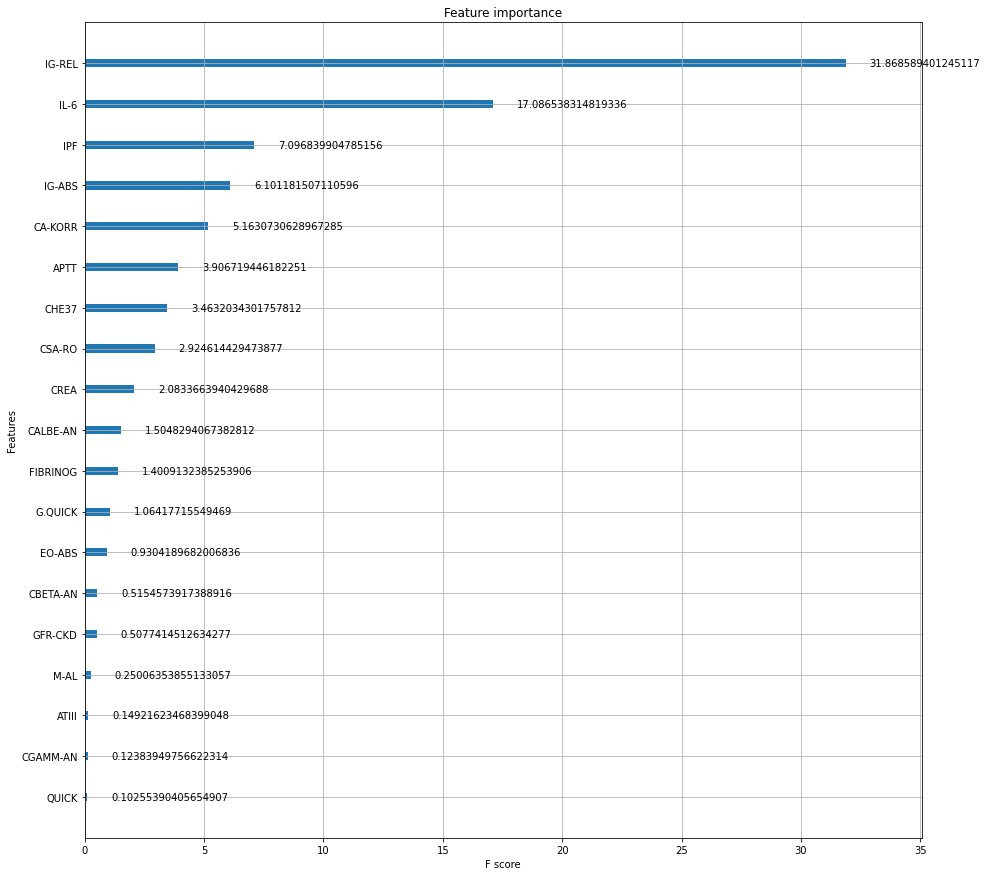

In [98]:
featureranking = sorted((value, key) for (key, value) in xgmodel.get_booster().get_score(importance_type = 'gain').items())
pyplot.rcParams['figure.figsize'] = [15,15]
features = []
for el in featureranking:
    features.append(el[1])
features.append('Status')
print(features)
plot_importance(xgmodel.get_booster().get_score(importance_type= 'gain'))
pyplot.show()

XGBoost: Feature Selection

In [69]:
traindata1 = traindata.loc[:, features]
traindata1.to_csv('model1v3train_Filled_selection.csv')
testdata1 = testdata.loc[:, features]
testdata1.to_csv('model1v3test_Filled_selection.csv')

Nach Feature-Selection:
Einlesen der Trainings-Daten

In [70]:
traindata = pd.read_csv('model1v3train_Filled_selection.csv') #model1v3train_Filled
traindata = traindata.iloc[:, 1:] #3
traindata = traindata.sample(frac=1, random_state=42).reset_index(drop=True) #Shuffle Rows and Reset Index
train_features = traindata.iloc[:, :-1]
train_class = traindata.iloc[:, -1]

Einlesen der Test-Daten

In [71]:
testdata = pd.read_csv('model1v3test_Filled_selection.csv') #model1v3test_Filled
testdata = testdata.iloc[:, 1:] #3
testdata = testdata.sample(frac=1, random_state=42).reset_index(drop=True)

test_features = testdata.iloc[:, :-1]
test_class = testdata.iloc[:, -1]

result = pd.read_csv('automated_algorithmen.csv')
result = result.iloc[:, 1:]


KNN

In [72]:
medKNN = KNeighborsClassifier(n_neighbors=4)
medKNN.fit(train_features,train_class)
knnYpred = medKNN.predict(test_features)
accuracyKNN = accuracy_score(test_class, knnYpred)
precisionKNN = precision_score(test_class, knnYpred)
recallKNN = recall_score(test_class, knnYpred)
f1scoreKNN = f1_score(test_class, knnYpred)
print('KNN Accuracy: ', accuracyKNN, 'KNN Precision: ', precisionKNN, 'KNN Recall: ', recallKNN, 'KNN F1-Score: ', f1scoreKNN )
# index = result.index[result['Modellierung'] == 'Model_1_version_3_selected'].tolist()
# result.at[index, 'KNN_precision'] = precisionKNN
# result.at[index, 'KNN_recall'] = recallKNN
# result.at[index, 'KNN_f1'] = f1scoreKNN
# result.to_csv('automated_algorithmen.csv')


KNN Accuracy:  0.651685393258427 KNN Precision:  0.04938271604938271 KNN Recall:  0.2 KNN F1-Score:  0.07920792079207921


Logistic Regression

In [73]:
lr_model = LogisticRegression()
lr_model.fit(train_features, train_class)
lr_y_pred = lr_model.predict(test_features)
lr_accuracyLogReg = accuracy_score(test_class, lr_y_pred)
lr_precisionLogReg = precision_score(test_class, lr_y_pred)
lr_recallLogReg = recall_score(test_class, lr_y_pred)
lr_f1scoreLogReg = f1_score(test_class, lr_y_pred)
print('Log-Regression Accuracy: ', lr_accuracyLogReg, 'Log-Regression Precision: ', lr_precisionLogReg, 'Log-Regression Recall: ', lr_recallLogReg, 'Log-Regression F1-Score: ', lr_f1scoreLogReg )
# index = result.index[result['Modellierung'] == 'Model_1_version_3_selected'].tolist()
# result.at[index, 'Logistic_Regression_precision'] = lr_precisionLogReg
# result.at[index, 'Logistic_Regression_recall'] = lr_recallLogReg
# result.at[index, 'Logistic_Regression_f1'] = lr_f1scoreLogReg
# result.to_csv('automated_algorithmen.csv')

Log-Regression Accuracy:  0.6179775280898876 Log-Regression Precision:  0.06382978723404255 Log-Regression Recall:  0.3 Log-Regression F1-Score:  0.10526315789473684


Decision Tree

In [74]:
medical_DecTree = DecisionTreeClassifier(random_state=15)
medical_DecTree = medical_DecTree.fit(train_features, train_class)
decTree_pred = medical_DecTree.predict(test_features)
accuracyDecTree = accuracy_score(test_class, decTree_pred)
precisionDecTree = precision_score(test_class, decTree_pred)
recallDecTree = recall_score(test_class, decTree_pred)
f1scoreDecTree = f1_score(test_class, decTree_pred)
print('medical_DecTree Accuracy: ', accuracyDecTree, 'DecTree Precision: ', precisionDecTree, 'DecTree Recall: ', recallDecTree, 'DecTree F1-Score: ', f1scoreDecTree )
# index = result.index[result['Modellierung'] == 'Model_1_version_3_selected'].tolist()
# result.at[index, 'Decision_Tree_precision'] = precisionDecTree
# result.at[index, 'Decision_Tree_recall'] = recallDecTree
# result.at[index, 'Decision_Tree_f1'] = f1scoreDecTree
# result.to_csv('automated_algorithmen.csv')

medical_DecTree Accuracy:  0.24344569288389514 DecTree Precision:  0.07476635514018691 DecTree Recall:  0.8 DecTree F1-Score:  0.13675213675213674


Random Forest

In [75]:
medical_RF = RandomForestClassifier(random_state=43)
medical_RF.fit(train_features, train_class)
rfPred = medical_RF.predict(test_features)
accuracyRF = accuracy_score(test_class, rfPred)
precisionRF = precision_score(test_class, rfPred)
recallRF = recall_score(test_class, rfPred)
f1scoreRF = f1_score(test_class, rfPred)
print('Anzahl Estimator: 100 ', 'RF Accuracy: ', accuracyRF, 'RF Precision: ', precisionRF, 'RF Recall: ', recallRF, 'RF F1-Score: ', f1scoreRF )
# index = result.index[result['Modellierung'] == 'Model_1_version_3_selected'].tolist()
# result.at[index, 'Random_Forest_precision'] = precisionRF
# result.at[index, 'Random_Forest_recall'] = recallRF
# result.at[index, 'Random_Forest_f1'] = f1scoreRF
# result.to_csv('automated_algorithmen.csv')

Anzahl Estimator: 100  RF Accuracy:  0.299625468164794 RF Precision:  0.053475935828877004 RF Recall:  0.5 RF F1-Score:  0.0966183574879227


ADABoost

In [76]:
adamodel = AdaBoostClassifier()
adamodel.fit(train_features, train_class)
adamodel_prediction = adamodel.predict(test_features)
adamodel_accuracy = accuracy_score(test_class, adamodel_prediction)
adamodel_precision = precision_score(test_class, adamodel_prediction)
adamodel_recall = recall_score(test_class, adamodel_prediction)
adamodel_f1 = f1_score(test_class, adamodel_prediction)
print('ADABOOST: ', 'Accuracy: ', adamodel_accuracy,'Precision: ', adamodel_precision,'Recall: ', adamodel_recall,'f1-Score: ', adamodel_f1)
# index = result.index[result['Modellierung'] == 'Model_1_version_3_selected'].tolist()
# result.at[index, 'ADABoost_precision'] = adamodel_precision
# result.at[index, 'ADABoost_recall'] = adamodel_recall
# result.at[index, 'ADABoost_f1'] = adamodel_f1
# result.to_csv('automated_algorithmen.csv')


ADABOOST:  Accuracy:  0.5168539325842697 Precision:  0.09022556390977443 Recall:  0.6 f1-Score:  0.1568627450980392


XGBoost

In [77]:
xgmodel = XGBClassifier(eval_metric='error')
xgmodel.fit(train_features, train_class)
xgboosted_prediction = xgmodel.predict(test_features)
xgboosted_accuracy = accuracy_score(test_class, xgboosted_prediction)
xgboosted_precision = precision_score(test_class, xgboosted_prediction)
xgboosted_recall = recall_score(test_class, xgboosted_prediction)
xgboosted_f1 = f1_score(test_class, xgboosted_prediction)
print('XGBOOST: ', 'Accuracy: ', xgboosted_accuracy, 'Precision: ', xgboosted_precision, 'Recall: ', xgboosted_recall, 'F1-Score: ', xgboosted_f1)
# index = result.index[result['Modellierung'] == 'Model_1_version_3_selected'].tolist()
# result.at[index, 'XGBoost_precision'] = xgboosted_precision
# result.at[index, 'XGBoost_recall'] = xgboosted_recall
# result.at[index, 'XGBoost_f1'] = xgboosted_f1
# result.to_csv('automated_algorithmen.csv')

XGBOOST:  Accuracy:  0.5093632958801498 Precision:  0.07633587786259542 Recall:  0.5 F1-Score:  0.13245033112582782
